# 结果展示

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

%matplotlib inline
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


## 数据读取

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
print("root_path: ", root_path)

root_path:  f:\projects\StockRL\learn\trade_file


In [3]:
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "account_value_{}.csv".format(model))

In [4]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
ddpg_account_value = pd.read_csv(path_dict["ddpg"])
ppo_account_value = pd.read_csv(path_dict["ppo"])
sac_account_value = pd.read_csv(path_dict["sac"])
td3_account_value = pd.read_csv(path_dict["td3"])

## 获取 baseline 的结果

In [5]:
baseline_df = get_baseline(config.SSE_50_INDEX, 
              start="20190101",
              end="20210101")
baseline_stats = backtest_stats(baseline_df, value_col_name='close')

   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)
Annual return          0.271107
Cumulative returns     0.589776
Annual volatility      0.189096
Sharpe ratio           1.366667
Calmar ratio           1.487275
Stability              0.618053
Max drawdown          -0.182284
Omega ratio            1.286287
Sortino ratio          1.953108
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.078570
Daily value at risk   -0.022798
dtype: float64


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [6]:
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6

In [7]:
baseline_df.head()

tic        date       open       high        low      close  \
0  000016.SH  2019-01-02  2262.7908  2298.1805  2301.0552  2252.7479   
1  000016.SH  2019-01-03  2269.2430  2259.4825  2287.7778  2253.9433   
2  000016.SH  2019-01-04  2314.6466  2252.7449  2316.3528  2249.3658   
3  000016.SH  2019-01-07  2314.3193  2329.0316  2331.6031  2306.8979   
4  000016.SH  2019-01-08  2305.1708  2312.1705  2312.1705  2298.9548   

       volume  day  processed_close  
0  20880697.0    2     1.000000e+06  
1  18895240.0    3     1.000531e+06  
2  25900596.0    4     9.984987e+05  
3  25278948.0    0     1.024037e+06  
4  18131160.0    1     1.020511e+06

## 展示最终的结果

In [8]:
result_account_value = pd.DataFrame(data = {
                                        'a2c': a2c_account_value['total_assets'], 
                                        'ddpg': ddpg_account_value['total_assets'],
                                        'ppo': ppo_account_value['total_assets'],
                                        'sac': sac_account_value['total_assets'],
                                        'td3': td3_account_value['total_assets'],
                                        'baseline': baseline_df['processed_close']})

In [9]:
result_account_value = result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)

In [10]:
result_account_value.head()

a2c      ddpg       ppo       sac       td3  baseline
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1 -0.000269 -0.000502 -0.000259 -0.001233 -0.000103  0.000531
2  0.004095  0.004911  0.002477  0.005780  0.006844 -0.001501
3  0.005295  0.005382  0.002729  0.005793  0.007314  0.024037
4  0.002303 -0.000069  0.001246  0.001629  0.004409  0.020511

<Axes: >

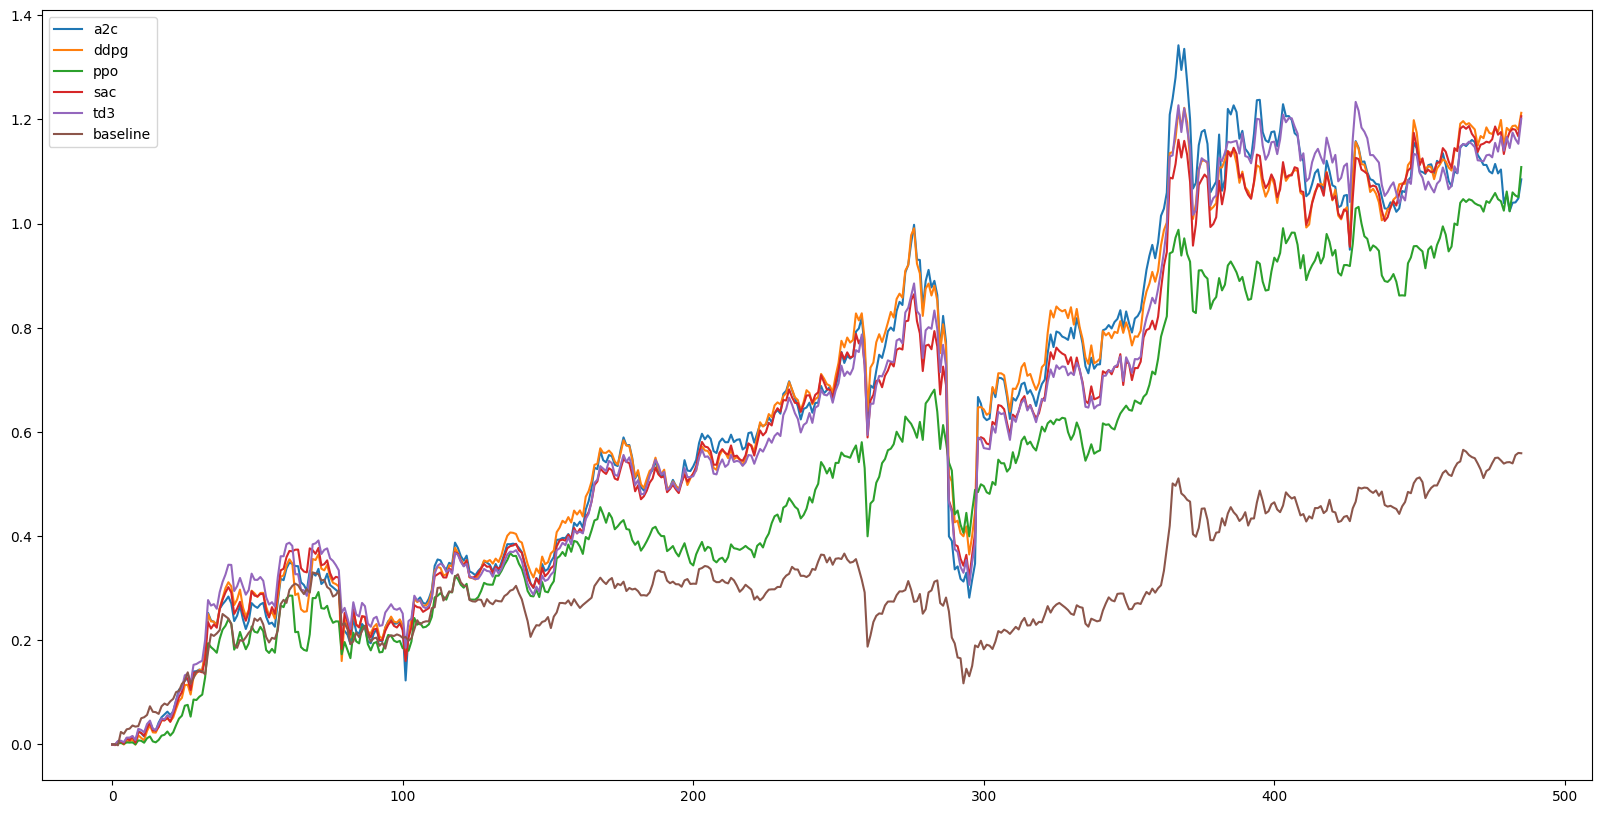

In [11]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
result_account_value.plot(figsize = (20, 10))

## 展示 A2C 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


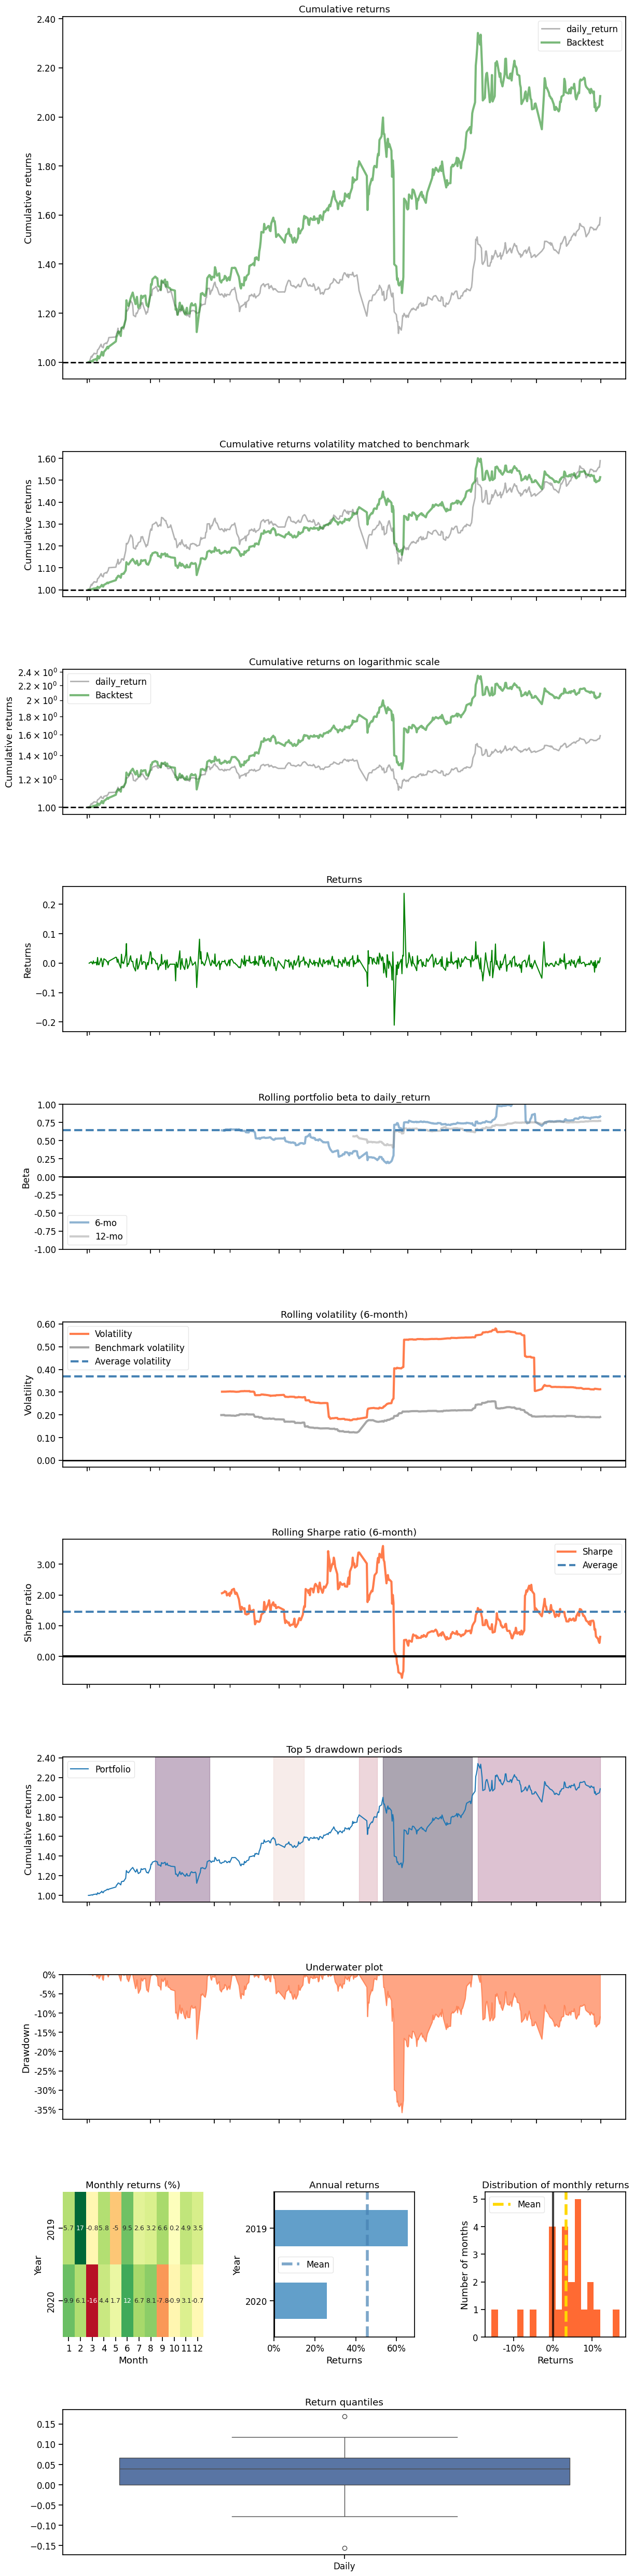

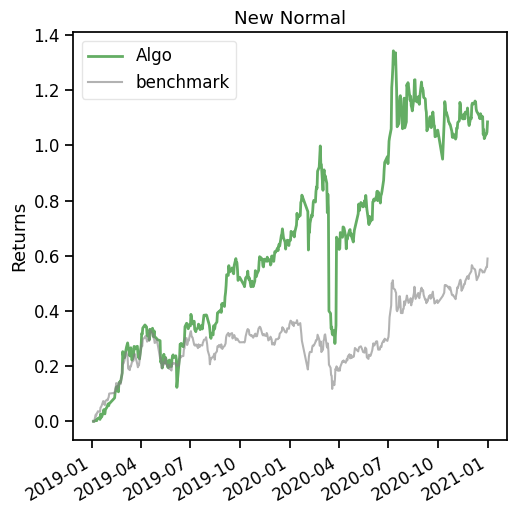

In [12]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(a2c_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 DDPG 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


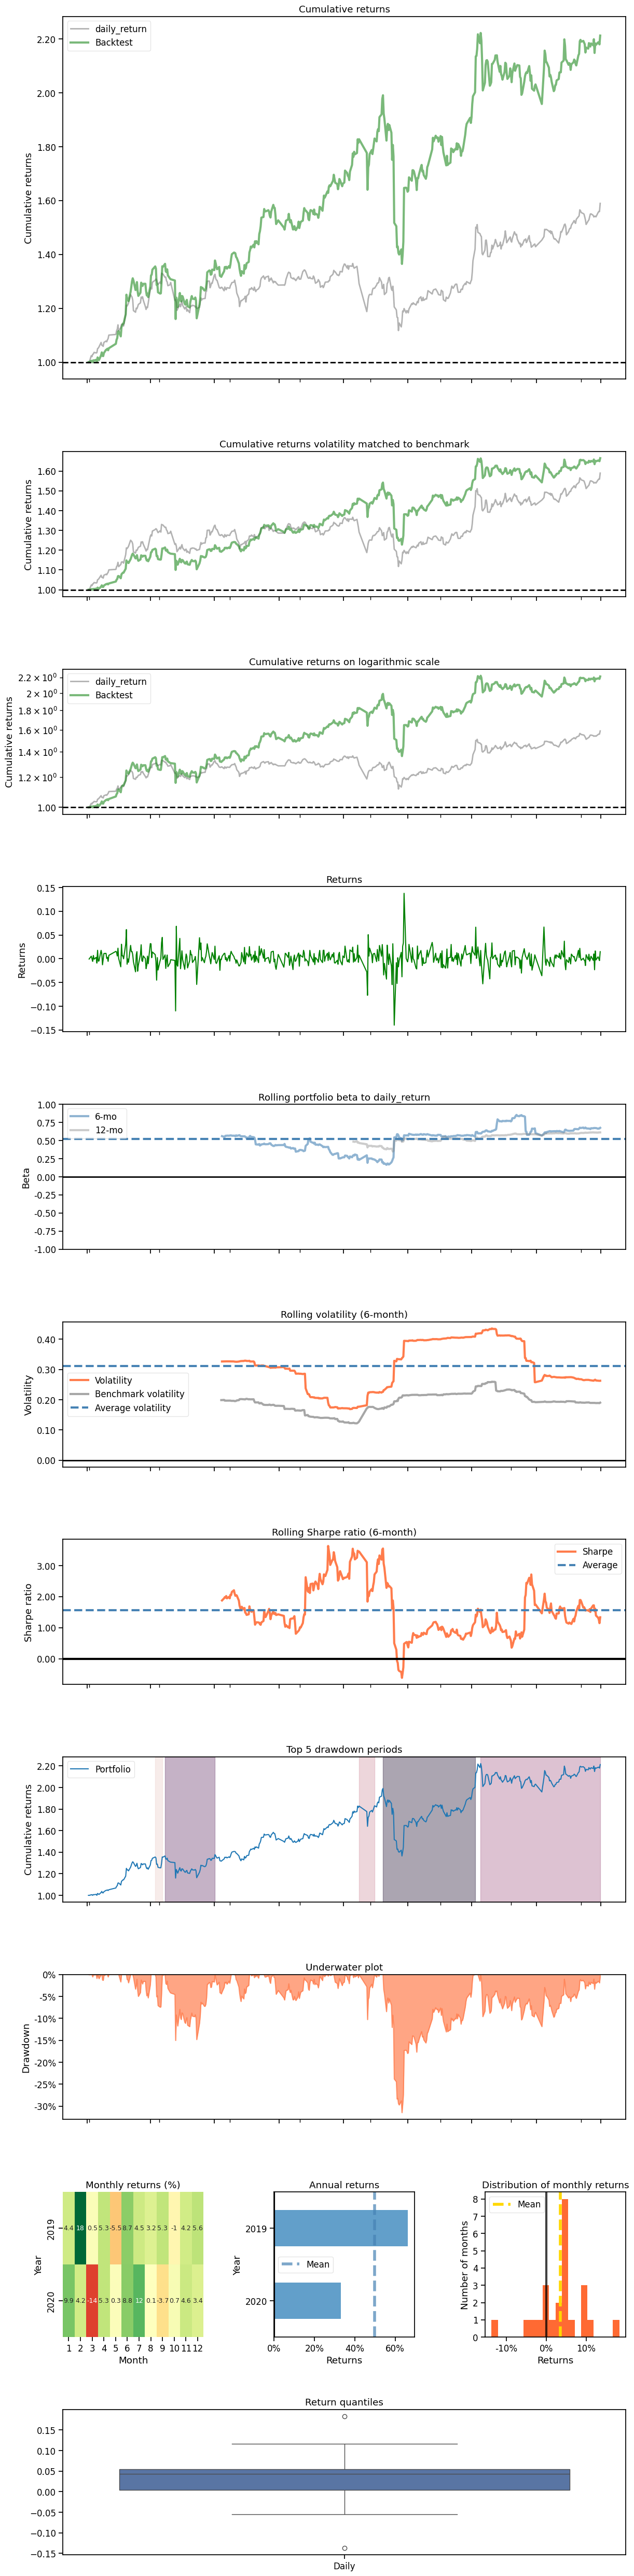

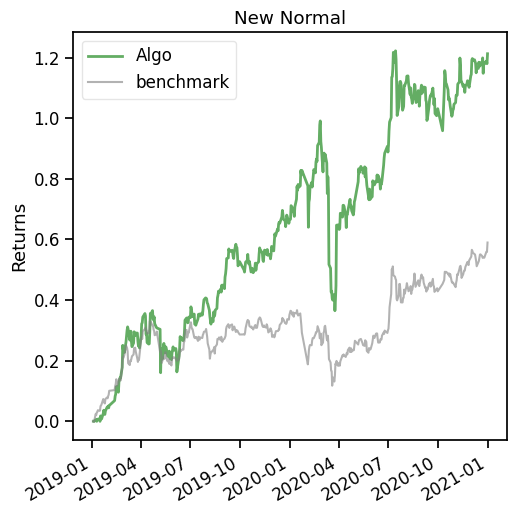

In [13]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ddpg_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

In [14]:
pip install pandas>=1.1.5

Note: you may need to restart the kernel to use updated packages.


## 展示 PPO 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


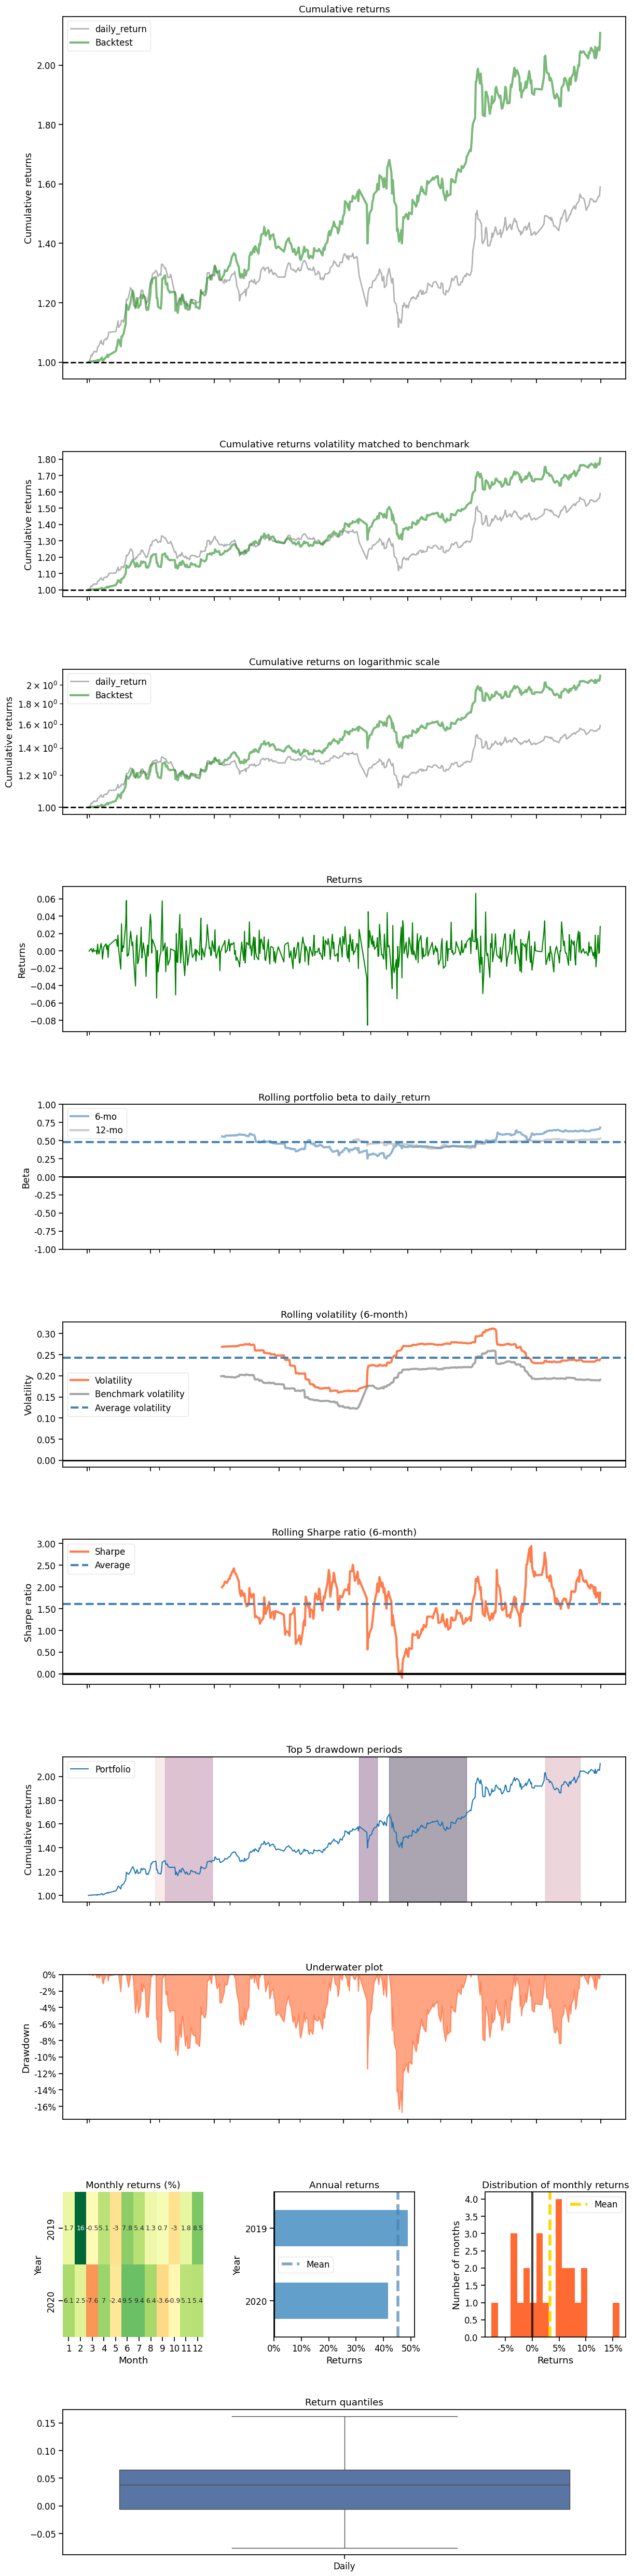

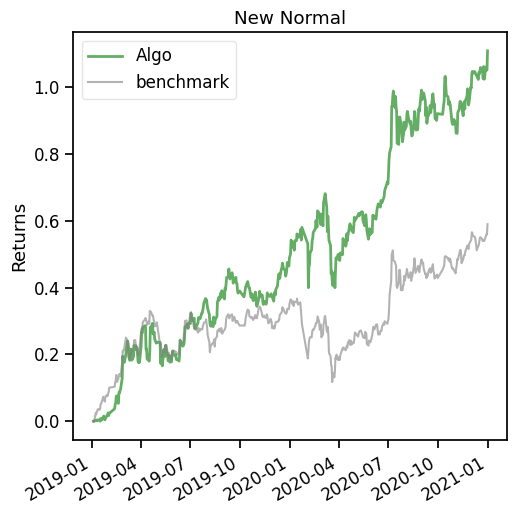

In [15]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ppo_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


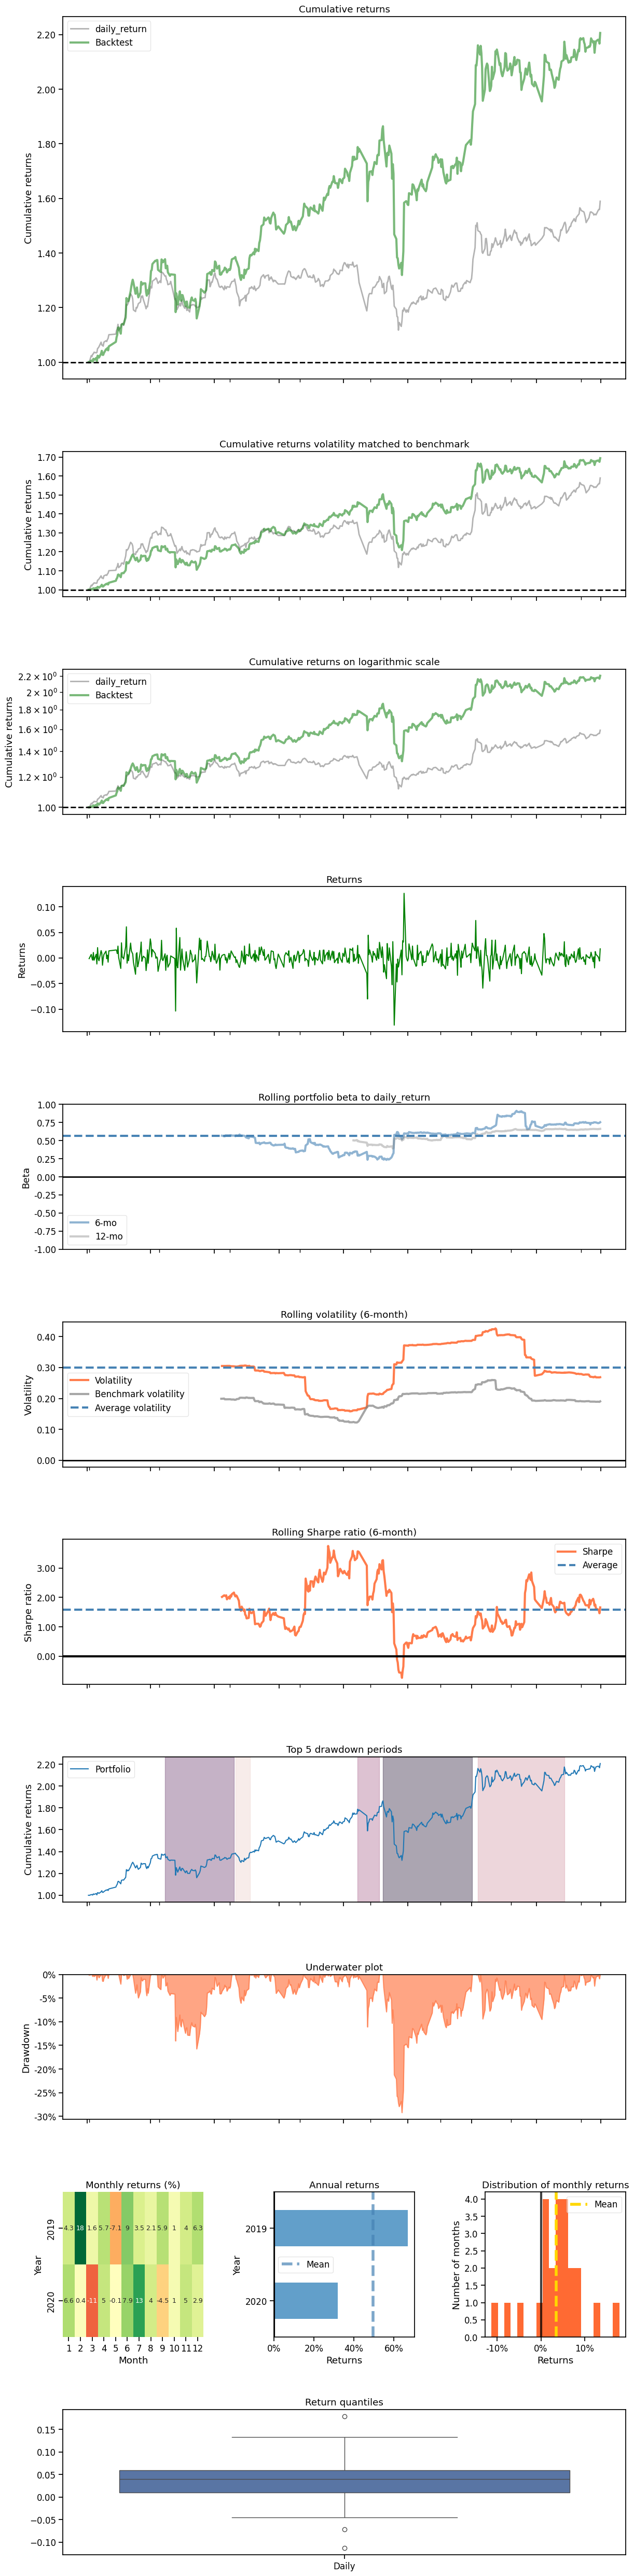

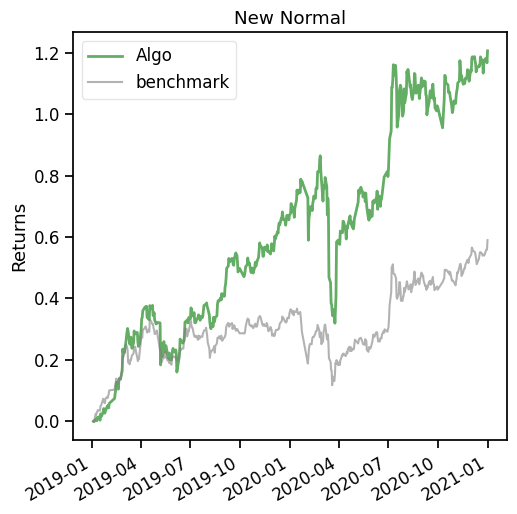

In [16]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(sac_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silenc

f:\Anaconda3\envs\myenv\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


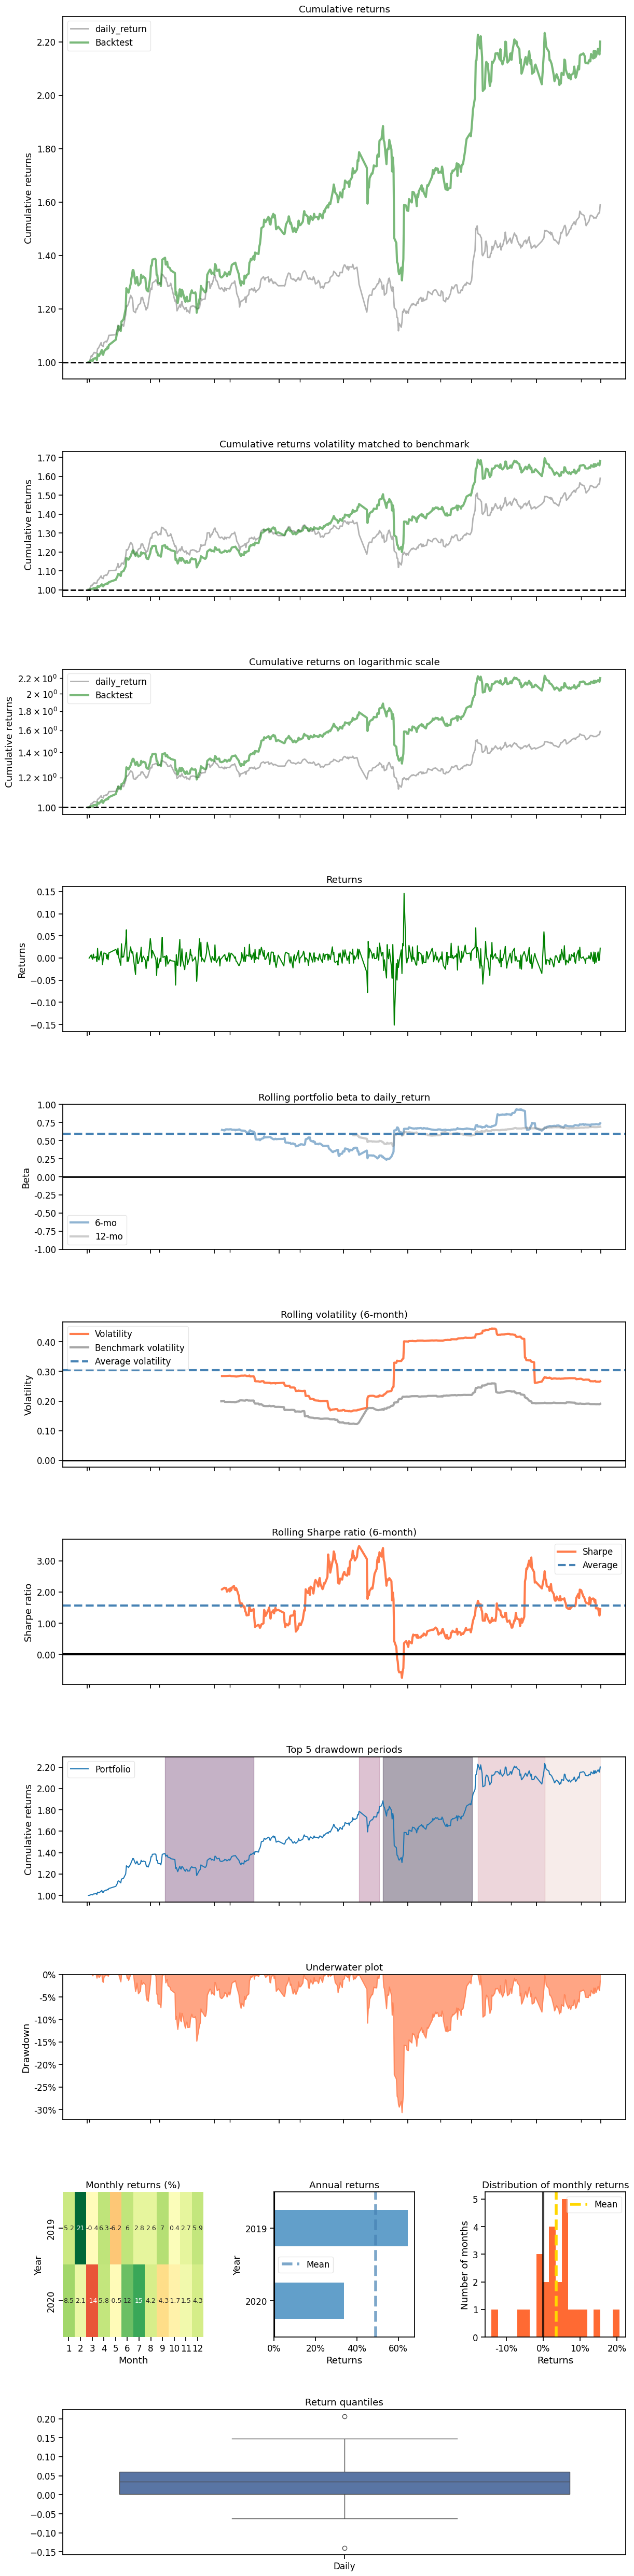

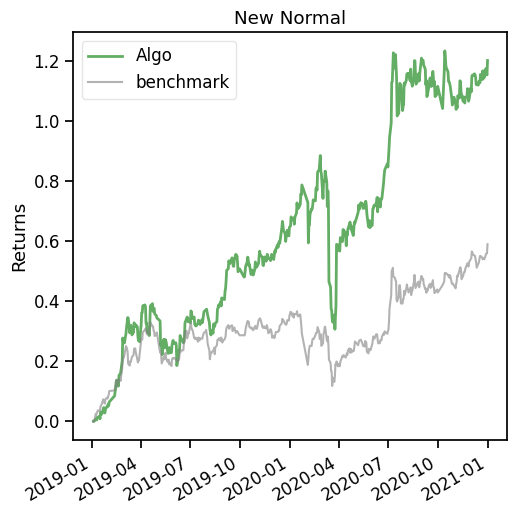

In [17]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(td3_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )